In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [2]:
def calcSim(target, predict):
    
    if len(target) != len(predict):
        return -1
    
    num_target = 0
    num_predict = 0
    num_union = 0    
    for i in range(len(target)):
        if (target[i] != 0):
            num_target = num_target + 1            
        if (predict[i] != 0):
            num_predict = num_predict + 1
        if (target[i] != 0) and (target[i] == predict[i]):
            num_union = num_union + 1
            
    sim = 2*(num_union/(num_target+num_predict))
    
    return sim

In [3]:
src = cv2.imread('./data/cardiac_cta.bmp', cv2.IMREAD_GRAYSCALE)
target = cv2.imread('./data/cardiac_label.bmp', cv2.IMREAD_GRAYSCALE)

In [4]:
## TODO : Segmentation
## 분할 결과를 predict라는 변수에 저장하면 됨
##
def region_growing(image, seed, threshold):
    height, width = image.shape[:2]
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros((height, width), dtype=np.uint8)

    stack = [seed]

    seed_value = int(image[seed[1], seed[0]])

    while stack:
        x, y = stack.pop()
        
        if visited[y, x] == 1:
            continue

        visited[y, x] = 1
        pixel_value = int(image[y, x])

        if abs(pixel_value - seed_value) < threshold:
            segmented[y, x] = pixel_value
            if x > 0:
                stack.append((x - 1, y))
            if x < width - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < height - 1:
                stack.append((x, y + 1))

    return segmented

seed = (177, 129)  # 시드 포인트
threshold = 27     # 강도 차이 임계값

# Region Growing을 수행합니다.
predict = region_growing(src, seed, threshold)

ret2, predict = cv2.threshold(predict, 30, 255, cv2.THRESH_BINARY)
ret3, labels, stats, centroids = cv2.connectedComponentsWithStats(predict)

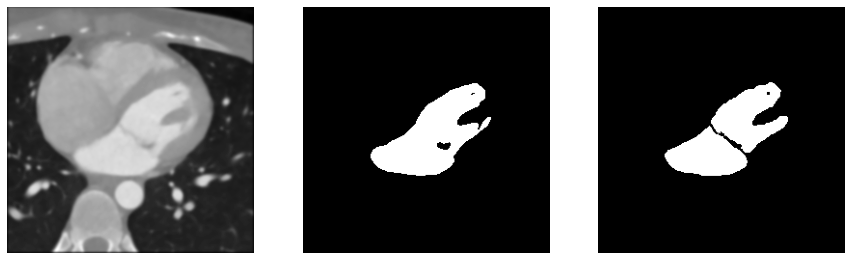

In [5]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(predict, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(target, cmap='gray')

In [6]:
target = target.flatten()
predict = predict.flatten()
print(target.shape)
print(predict.shape)

target[target[:] == 255] = 1
predict[predict[:] == 255] = 1

sim = calcSim(target, predict)
print("similarity: ", sim)

(65536,)
(65536,)
similarity:  0.9623748705557473
